In [ ]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
print(len(train_data))
print(len(train_labels))
print(train_data[10])
print(train_labels.shape)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step
8982
8982
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
(8982,)


In [ ]:
# Reverse dictionary to see words instead of integers
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

print(decoded_newswire)
print(train_labels[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [ ]:
# preparing the data
# encoding the data
import numpy as np
# VECTORIZE function

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
# Vectorize and Normalize train and test to tensors with 10k columns

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (8982, 10000)
x_test  (2246, 10000)


In [ ]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
# for categorical data we mainly prefer one_hot encoding

def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
#  one hot encoding can also be done using keras built-in properties

from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("one_hot_train_labels ", one_hot_train_labels.shape)
print("one_hot_test_labels ", one_hot_test_labels.shape)

one_hot_train_labels  (8982, 46)
one_hot_test_labels  (2246, 46)


In [ ]:
# setting aside validation data

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (1000, 10000)
y_val  (1000, 46)
partial_x_train  (7982, 10000)
partial_y_train  (7982, 46)


In [ ]:
#  model definition

from keras import models,layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_val, y_val)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

history_dict = history.history
history_dict.keys()

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 298us/step - loss: 6.0882 - acc: 0.3869 - val_loss: 3.1430 - val_acc: 0.5400
Epoch 2/10
7982/7982 [==============================] - 1s 140us/step - loss: 3.0533 - acc: 0.5226 - val_loss: 2.6669 - val_acc: 0.6150
Epoch 3/10
7982/7982 [==============================] - 1s 136us/step - loss: 2.7261 - acc: 0.5818 - val_loss: 2.4787 - val_acc: 0.6570
Epoch 4/10
7982/7982 [==============================] - 1s 136us/step - loss: 2.5664 - acc: 0.6190 - val_loss: 2.3711 - val_acc: 0.6730
Epoch 5/10
7982/7982 [==============================] - 1s 141us/step - loss: 2.4480 - acc: 0.6411 - val_loss: 2.2959 - val_acc: 0.6770
Epoch 6/10
7982/7982 [==============================] - 1s 137us/step - loss: 2.3621 - acc: 0.6592 - val_loss: 2.2459 - val_acc: 0.6920
Epoch 7/10
7982/7982 [==============================] - 1s 138us/step - loss: 2.2967 - acc: 0.6693 - val_loss: 2.1965 - val_acc: 0.6970


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

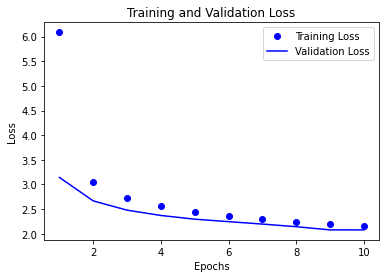

In [ ]:
# plotting the losses

# plotting training loss and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(loss)

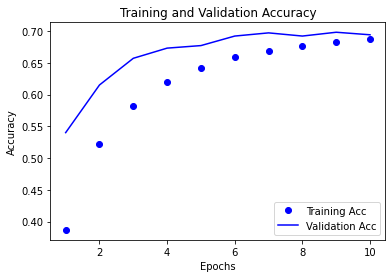

In [ ]:
# plotting accuracy
plt.clf()  # clears the figure


acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [ ]:
#  the netowrk overfits after 9 epochs

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 290us/step - loss: 2.8332 - categorical_accuracy: 0.4441 - val_loss: 1.8647 - val_categorical_accuracy: 0.6500
Epoch 2/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.5054 - categorical_accuracy: 0.7103 - val_loss: 1.3414 - val_categorical_accuracy: 0.7160
Epoch 3/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.0766 - categorical_accuracy: 0.7736 - val_loss: 1.1311 - val_categorical_accuracy: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.8316 - categorical_accuracy: 0.8274 - val_loss: 1.0442 - val_categorical_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.6601 - categorical_accuracy: 0.8659 - val_loss: 0.9681 - val_categorical_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.5263 - categorical_accuracy:

In [ ]:

# PREDICT

predictions = model.predict(x_test)
# Each entry in predictions is a vector of length 46
print(predictions[123].shape)

# The coefficients in this vector sum to 1:
print(np.sum(predictions[123]))

# The largest entry is the predicted class — the class with the highest probability:
print(np.argmax(predictions[124]))

(46,)
1.0000001
18


In [ ]:
# Get the top 3 classes
print(predictions[124].argsort()[-3:][::-1])

print(test_labels[124])

[18 43  2]
18


In [ ]:
# one more way of encoding the labels would be to cast them as an integer tensor

y_train = np.array(train_labels)
y_test = np.array(test_labels)
# now with integer labels we will use sparse categorical crossentropy loss function